In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)

# Combine the data into a single dataset
df = pd.merge(city_data,ride_data)

# Display the data table for preview
df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

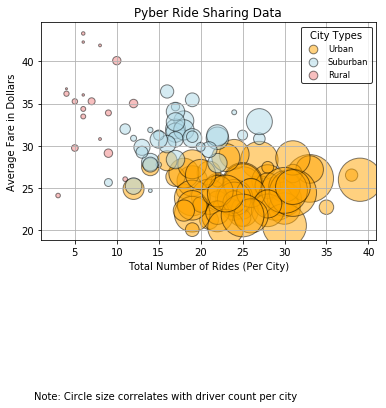

In [2]:
# Obtain the x and y coordinates for each of the three city types
#filter df for each city type
urban = df.loc[(df['type'] == 'Urban')]
sub = df.loc[(df['type'] == 'Suburban')]
rural =df.loc[(df['type'] == 'Rural')]

#calcualte avg fare per city in each type
u_fare = urban.groupby(['city'])['fare'].mean()              
s_fare = sub.groupby(['city'])['fare'].mean()
r_fare = rural.groupby(['city'])['fare'].mean()
              
#calculate number of rides per city per type
u_rides = urban.groupby(['city'])['ride_id'].count()
s_rides = sub.groupby(['city'])['ride_id'].count()
r_rides = rural.groupby(['city'])['ride_id'].count()
              
#calculate drivers per city in each type
u_drivers = urban.groupby(['city'])['driver_count'].sum()
s_drivers = sub.groupby(['city'])['driver_count'].sum()
r_drivers = rural.groupby(['city'])['driver_count'].sum()            
              
# Build the scatter plots for each city types
plt.scatter(u_rides, u_fare, s= u_drivers, marker = 'o', color = 'orange', edgecolor = 'black', alpha = .5, label = 'Urban' )
plt.scatter(s_rides, s_fare, s= s_drivers, marker = 'o', color = 'lightblue', edgecolor = 'black', alpha = .5, label = 'Suburban' )
plt.scatter(r_rides, r_fare, s= r_drivers, marker = 'o', color = 'lightcoral',edgecolor = 'black', alpha = .5, label = 'Rural' )
# Incorporate the other graph properties
plt.grid(True)
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare in Dollars')

# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black', title = 'City Types', fontsize = 'small')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
# Incorporate a text label regarding circle size
txt = "Note: Circle size correlates with driver count per city"
plt.text(0.1, 0.1, txt)
# Save Figure
plt.savefig("../scatter")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

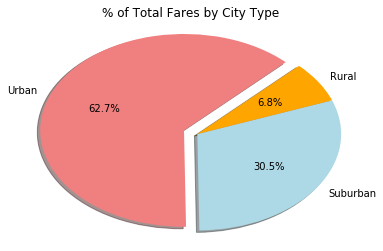

In [4]:
# Calculate Type Percents
total = urban['fare'].sum() + sub['fare'].sum() + rural['fare'].sum()
u_farepct = urban['fare'].sum()/total
s_farepct = sub['fare'].sum()/total
r_farepct = rural['fare'].sum()/total
fare_pie = [u_farepct,s_farepct,r_farepct]
labels = ["Urban", "Suburban", "Rural"]

explode = [0.1,0,0]
colors = ['lightcoral', 'lightblue', 'orange']

# Build Pie Chart
plt.pie(fare_pie, explode = explode, colors = colors, labels = labels, shadow = True, autopct='%1.1f%%',
       startangle = 45)
plt.axis('normal')
plt.title('% of Total Fares by City Type')



# Save Figure
plt.savefig("../fares.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

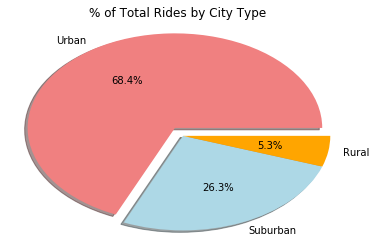

In [6]:
# Calculate Type Percents
total_r = urban['ride_id'].count() + sub['ride_id'].count() + rural['ride_id'].count()
u_ridep = urban['ride_id'].count()/total_r
s_ridep = sub['ride_id'].count()/total_r
r_ridep = rural['ride_id'].count()/total_r
ride_pie = [u_ridep,s_ridep,r_ridep]
labels = ["Urban", "Suburban", "Rural"]

explode = [0.1,0,0]
colors = ['lightcoral', 'lightblue', 'orange']

# Build Pie Chart
plt.pie(ride_pie, explode = explode, colors = colors, labels = labels, shadow = True, autopct='%1.1f%%')
plt.axis('normal')
plt.title('% of Total Rides by City Type')


# Save Figure
plt.savefig("../rides")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

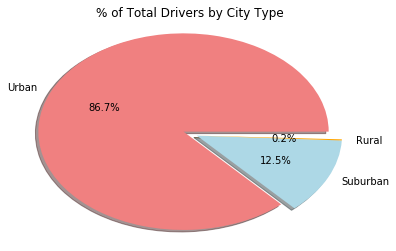

In [8]:
# Calculate Driver Percents
total_d = urban['driver_count'].sum() + sub['driver_count'].sum() + rural['driver_count'].sum()
u_drivers = urban['driver_count'].sum()/total_d
s_drivers = sub['driver_count'].sum()/total_d
r_drivers = rural['driver_count'].count()/total_d
driver_pie = [u_drivers,s_drivers,r_drivers]
labels = ["Urban", "Suburban", "Rural"]

# Build Pie Charts
drivers_pie = [u_drivers,s_drivers,r_drivers]
labels = ["Urban", "Suburban", "Rural"]
explode = [0.1,0,0]
colors = ['lightcoral', 'lightblue', 'orange']

plt.pie(driver_pie, explode = explode, colors = colors, labels = labels, shadow = True, autopct='%1.1f%%')
plt.title('% of Total Drivers by City Type')
plt.axis('normal')


# Save Figure
plt.savefig("../drivers")

#I don't know wy my numbers on this one aren't showing up the same as in the example

In [9]:
# Show Figure
plt.show()